**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab23](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23_Class.ipynb)

___

# <font color=darkred>Laboratory 33: KNN Classification </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 33 - In-Class and Homework

___


## Example: Iris Plants Classification <br>

<img src="https://i.etsystatic.com/10589108/r/il/213b38/1876572420/il_570xN.1876572420_ikcm.jpg" width="200" align="left" style="padding-right: 20px"> 

This is a well known problem and database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day. 
The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers. 

The Iris Data Set contains information on sepal length, sepal width, petal length, petal width all in cm, and class of iris plants. 
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
Hence, it is a multiclass classification problem and the number of observations for each class is balanced.

<img src="https://miro.medium.com/max/1000/1*lFC_U5j_Y8IXF4Ga87KNVg.png" width="500"><br>


Let's use a KNN model in Python and see if we can classifity iris plants based on the four given predictors.

<hr>

*__Acknowledgements__*
1. *Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).*
2. *Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.*
3. *Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments".  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.*
4. *Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions on Information Theory, May 1972, 431-433.*      
5. *See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II conceptual clustering system finds 3 classes in the data.*

Load some libraries:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

Read the dataset and explore it using tools such as descriptive statistics:

In [3]:
# Read the remote directly from its url (Jupyter):
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.tail(9)

,sepal-length,sepal-width,petal-length,petal-width,Class
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Split the predictors and target - similar to what we did for logisitc regression:

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Then, the dataset should be split into training and testing. This way our algorithm is tested on un-seen data, as it would be in a real-world application. Let's go with a 80/20 split:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#This means that out of total 150 records:
#the training set will contain 120 records & 
#the test set contains 30 of those records.

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn. The first step is to import the `KNeighborsClassifier` class from the `sklearn.neighbors` library. In the second line, this class is initialized with one parameter, i.e. `n_neigbours`. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

The final step is to make predictions on our test data. To do so, execute the following script:

In [9]:
y_pred = classifier.predict(X_test)

As it's time to evaluate our model, we will go to our rather new friends, confusion matrix, precision, recall and f1 score as the most commonly used discrete GOF metrics.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Actual label')

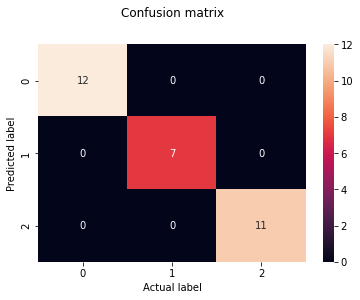

In [11]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

What if we had used a different value for K? What is the best value for K?

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset. In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 50. To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 50:

In [12]:
error = []

# Calculating error for K values between 1 and 50
# In each iteration the mean error for predicted values of test set is calculated and
# the result is appended to the error list.
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values:

Text(0, 0.5, 'Mean Error')

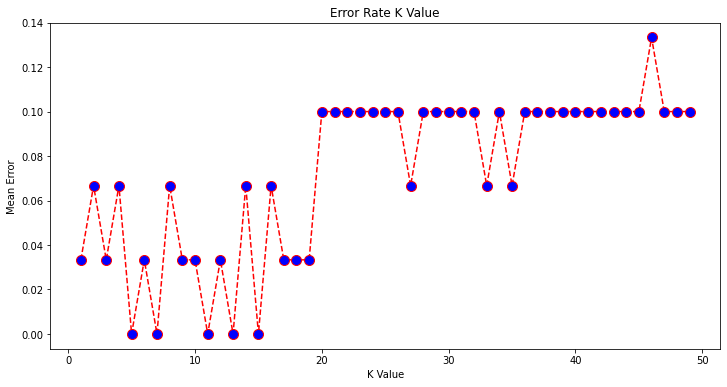

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Exercise
Everything above we did in class, but how about classifing a new measurement? Thats your homework exercise!

A framework might be:
- Use the database to train a classifier (done)
- Explore the sturcture of `y_pred = classifier.predict(X_test)` This seems like the tool we want.
- Once you know how to predict from the classifier, determine the classification of thge following sample

|sepal-length|sepal-width|petal-length|petal-width|
|---|---|---|---|
|6.9|3.1|5.1|2.3|